# CS-513 Midterm 1

## Question 2
___
Wyatt Blair

3/26/24
___


#2 (15 Points)

Load the “Admission_v2_missing” dataset, from the raw_data module in CANVAS, into R/Python. This is a fictional undergraduate admission data set (see the description below). Perform the EDA analysis by:

1.	Summarizing each numeric column (e.g., min, max, mean).
2.	Identifying missing values.
3.	Replacing the numerical missing values with the “mean” of the corresponding column.
4.	Displaying the scatter plot of “GRE”, “GPA” and “Rank”, one pair at a time.
5.	Showing box plots for columns: “GRE”, and “GPA” one graph at a time.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
dataset = pd.read_csv('../data/Admission_v2_missing.csv', index_col='Applicant')
dataset.head(5)

,ADMIT,GRE,GPA,RANK
Applicant,,,,
1001,NO,380.00,3.61,3
1002,YES,660.00,3.67,3
1003,YES,800.00,4.00,1
1004,YES,640.00,3.19,4
1005,NO,520.00,2.93,4


In [64]:
dataset.dtypes

ADMIT    object
GRE      object
GPA      object
RANK      int64
dtype: object

In [65]:
dataset['GPA'] = dataset['GPA'].replace(' ', np.nan).astype(np.float64)
dataset['GRE'] = dataset['GRE'].replace(' ', np.nan).astype(np.float64)
dataset['ADMIT'] = dataset['ADMIT'].apply(lambda admit: np.int_(admit == 'YES'))

In [66]:
dataset.dtypes

ADMIT      int32
GRE      float64
GPA      float64
RANK       int64
dtype: object

In [67]:
dataset.head(5)

,ADMIT,GRE,GPA,RANK
Applicant,,,,
1001,0,380.0,3.61,3
1002,1,660.0,3.67,3
1003,1,800.0,4.00,1
1004,1,640.0,3.19,4
1005,0,520.0,2.93,4


## I. Summarizing each numeric column (e.g., min, max, mean).

In [75]:
eda_funcs = {
    'min': lambda frame: frame.min(axis=0),
    'max': lambda frame: frame.max(axis=0),
    'mean': lambda frame: frame.mean(axis=0),
    'median': lambda frame: frame.median(axis=0),
}

numeric = dataset[['GRE', 'GPA', 'RANK']]
summary_frame = {
    func_name: func(numeric)
    for func_name, func
    in eda_funcs.items()
}

numeric_summary = pd.DataFrame(summary_frame)
display(numeric_summary)

,min,max,mean,median
GRE,220.00,800.0,587.44898,580.0
GPA,2.26,4.0,3.39264,3.4
RANK,1.00,4.0,2.48500,2.0


## II. Identifying missing values.

In [88]:
categorical_counts = [
    dataset[col].value_counts()
    for col in ['ADMIT', 'RANK']
]
categorical_counts

[0    273
 1    127
 Name: ADMIT, dtype: int64,
 2    151
 3    121
 4     67
 1     61
 Name: RANK, dtype: int64]

#### seems like there are no missing values in the categorical cols

In [90]:
# values which are null
dataset.isnull().any()

ADMIT    False
GRE       True
GPA       True
RANK     False
dtype: bool

## III. Replacing the numerical missing values with the “mean” of the corresponding column.

In [91]:
filled_dataset = dataset.fillna(value=numeric_summary['mean'])

# check that there are no null values left
filled_dataset.isnull().any()

ADMIT    False
GRE      False
GPA      False
RANK     False
dtype: bool

In [92]:
# take a look at the newly filled in rows
filled_dataset[dataset.isnull().any(axis=1)]

,ADMIT,GRE,GPA,RANK
Applicant,,,,
1049,0,440.00000,3.39264,4
1051,0,587.44898,3.86000,3
1060,0,600.00000,3.39264,4
1065,0,587.44898,4.00000,3
1087,0,600.00000,3.39264,2
1096,0,587.44898,3.33000,2
1103,0,380.00000,3.39264,4
1121,1,587.44898,3.74000,2
1126,0,540.00000,3.39264,4


## IV. Displaying the scatter plot of “GRE”, “GPA” and “Rank”, one pair at a time.

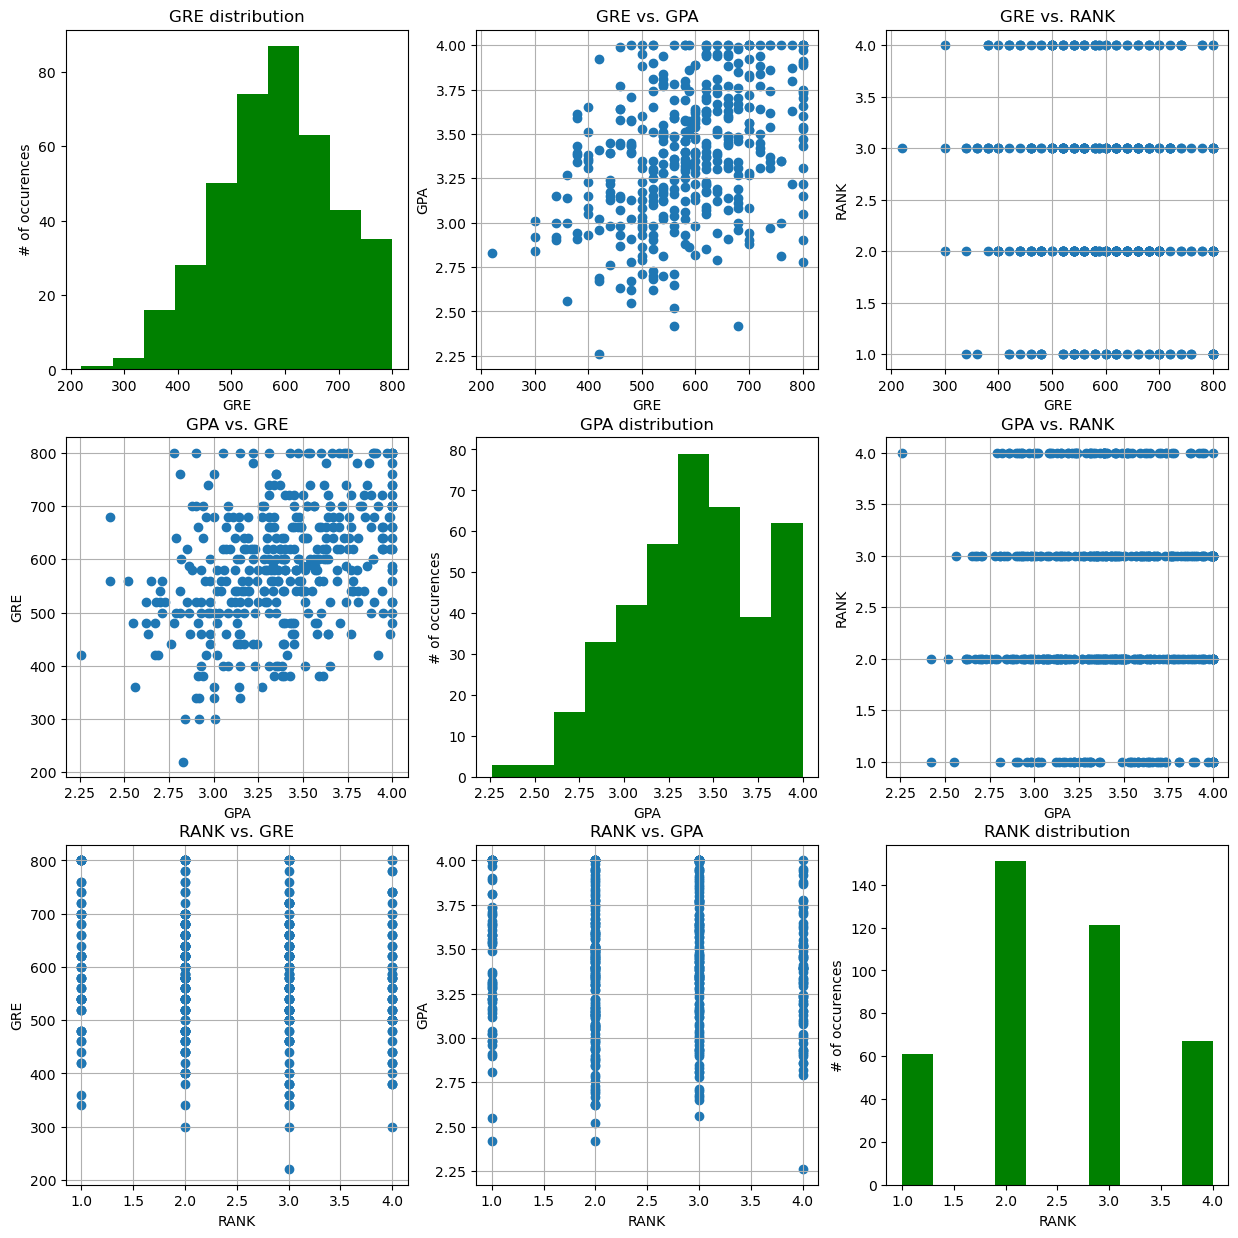

In [101]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
cols = ['GRE', 'GPA', 'RANK']

for col1, ax_row in zip(cols, axs):
    for col2, ax in zip(cols, ax_row):

        if col1 == col2:

            ax.hist(filled_dataset[col1], color='green')
            ax.set_title(f"{col1} distribution")
            ax.set_xlabel(col1)
            ax.set_ylabel('# of occurences')

        else:

            ax.scatter(filled_dataset[col1], filled_dataset[col2])
            ax.set_title(f"{col1} vs. {col2}")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.grid()

plt.show()

## V. Showing box plots for columns: “GRE”, and “GPA” one graph at a time.

<Axes: >

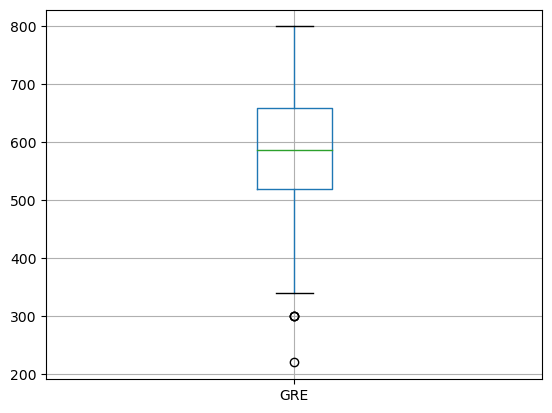

In [104]:
filled_dataset.boxplot(column=['GRE'])  

<Axes: >

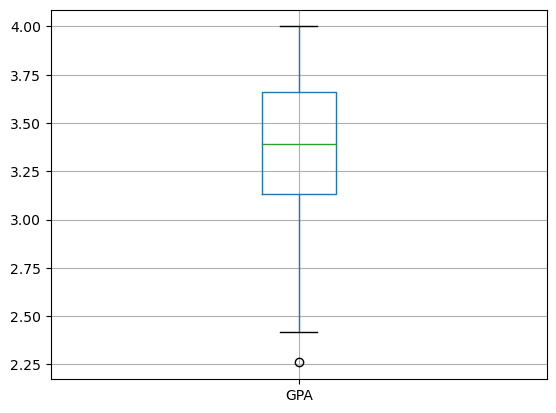

In [105]:
filled_dataset.boxplot(column=['GPA'])